# Final Project Preliminary Proposal
## Exploring Barriers to Civic Engagement Among Seattle's Immigrant and Refugee Population

In recent years, the United States has experienced a historically high influx of immigrants from around the globe. According to the Migration Policy Institute, more than 44.9 million immigrants were reported to be living in the United States in 2019. The current mass immigration is also unique in its demographics compared to those in the past. Whereas immigration to America in the mid-1900s had largely brought in individuals from Europe, those who are immigrating today are from Latin American and Asian origins. With the country's introduction to a massive new population of diverse backgrounds, it is of great pertinance that their integration to United States is well-facilitated. One essential facet of integrating immigrants to the United States is their active civic engagement. Civic engagement is vital to the protection of the rights and values of each unique peoples that comprise the communities within the country. A practical step towards ensuring the civic engagement among immigrants is to seek insight into the perspectives of the individuals that comprise these groups. The hope is that by acquiring a better understanding the attitudes of immigrants in engaging in civic activities, local governmments can create more effective mechanisms to support their particpation. 

The data I will use in my analysis is a [dataset](https://data.seattle.gov/Community/Seattle-Votes-Survey-Data-from-5-224-immigrant-and/y5cf-gy2p) comprised of survey data from 5,224 immigrants and refugees living in Seattle. The data was published by the City of Seattle and the work is in a public domain. The reason I chose to work with this particular dataset is that the survey from which the data was collected contains questions inquiring on the motivations behind why the participants choose to vote or not vote. On the other hand, certain aspects of the manner in which this data was collected raises some potential ethical concerns. For one, the survey the participants were tasked to complete is written in English, and many participants indicated that the language that they are most comfortable with is not English. This raises the concern of instances where partcipants may have misinterpreted some of the survey questions, which could have resulted in discrepancies between their responses and their actual perspectives. Similarly, while most questions where in the form of multiple choice, some required participants to write-out their answers in English. Again, this opens the possibility that these written answers may be not exactly representative of what the partcipant was intending to convey. 

In regards to unknown and dependencies, my ability to complete this project is highly reliant on me allocating sufficient time through the rest of the quarter to work on this analysis. It will be vital for me to organize a work plan from here on out that appropriately paces my progress towards completing the project. This is especially important given the other coursework I will have to balance on top of this assignment. In speaking of unknowns, this preliminary assignment will actually be submitted past the deadline because I had unexpectedly caught covid on May 5th. However, despite this unforeseen setback, I expect that I will fully be able to complete this project by the end of the quarter.

## Research Questions

1. What are the reasons that eligible immigrants don't register to vote?
2. Do immigrants and refugees that are active in their civic engagement tend to have higher levels of education than those who are less active?
3. Do immigrants and refugees that are active in their civic engagement tend to have a greater proficiency in English than those who are less active?
4. How does gender distribution differ between immigrants and refugees that are active in their civic engagement compared to those that are less active?
5. Do immigrants and refugees that are active in their civic engagement tend to have higher incomes than those who are less active?
6. Do immigrants and refugees that are active in their civic engagement tend to be younger than those who are less active?
7. What are the most important issues facing immigrant communities as reported by the participants?

## Background/Related Works

There have been multiple studies conducted in the past that have similarly explored the motives and perspectives behind immigrants' contribution to their communities. For instance, a study published by the International Society for Third Sector Research conducted a survey on a sample of 54 immigrants. From their study, the researchers found common themes that arose when interviewing their sample participants. Many of the participants were driven to contribute to their community by a desire to establish and ethnic connection, a sense of duty/obligation, and using contribution as a measure of success. 

## Methodology

My work will involve descriptive statistics supplemented by exploratory data analysis to explore the state of civic engagement among the immigrants and refugees of Washington state. My analysis will begin with the calculation of several summary statistics to comphrehensively overview the demographics of the sample used in the dataset. These summary statistics will be supplemented with data visualizations to faciliate their comphrehension. These initial calculations will also help to bring to light potential limitations of the dataset through comparing the demographics of the given sample with the previously reported demographics of Washington state immigrants. Descriptive data analytical methods will be used to explore research questions 1,2, 4, and 5. Specifically, the exploration of these research questions will involve several calculation of frequencies and central tendencies. These statistical calculations will also be supplemented with several data visualizations, mostly in the form of bar charts. The "level of civic engagement" pertaining to the second research question will be quantified with the consideration of the participant's answers to questions 12, 15, and 18 on the survey. On the other hand, the exploration of the third research question will involve a multivariate analysis of several variables that could contribute to the participants' civic engagement. The variables to be considered include the participants' education level, gender, birth year, english proficiency, the year they moved to the US, income, and the number of people living in their household. The correlation coefficient between each of these variables and the participant's "level of civic engagement" (as calculated for research question 2) will be calculated and displayed on a table. 

# Results

## Data Processing

In [80]:
import pandas as pd
from IPython.display import display
from scipy.stats import chi2_contingency
import researchpy as rp
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# Formatting dataset as CSV
df = pd.read_csv('/home/jovyan/hcde-410-final/seattle_votes_data.csv')
df = df.dropna(subset=['Q02'])
df['Q02'] = df['Q02'].astype('int')

## Summary Statistics

,Count
Somalia,1062
Ethiopia,584
Vietnam,522
Mexico,508
China,408
...,...
Guam,1
Albania,1
Malta,1
New Zealand,1


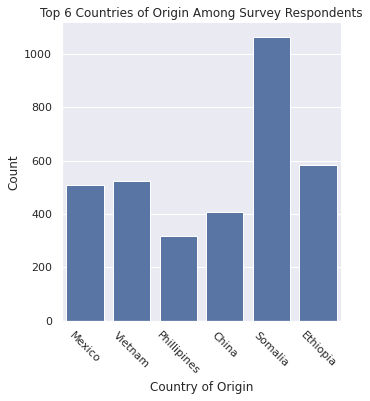

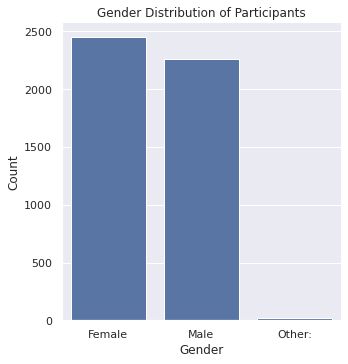

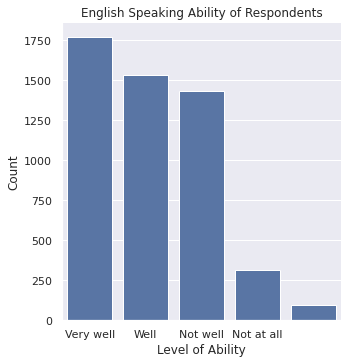

In [78]:
countries_of_origin = list(df['Q01'].unique())
# Finding the counts for each country of origin
country_count_dict = {}
for country in countries_of_origin:
    count = len(df[df['Q01'] == country])
    country_count_dict[country] = count
country_count = pd.DataFrame.from_dict(country_count_dict, orient='index')
country_count = country_count.sort_values(by=[0], ascending=False)
country_count.columns = ['Count']
display(country_count)

# Filtering for the top 6 countries by count
somalia = df['Q01'] == 'Somalia'
ethiopia = df['Q01'] == 'Ethiopia'
vietnam  = df['Q01'] == 'Vietnam'
mexico = df['Q01'] == 'Mexico'
china = df['Q01'] == 'China'
phillipines = df['Q01'] == 'Phillipines'
top_6_countries = df[somalia | ethiopia | vietnam | mexico | china | phillipines]

sns.catplot(x='Q01', kind='count', color='b', data=top_6_countries)
plt.xticks(rotation=-45)
plt.title('Top 6 Countries of Origin Among Survey Respondents')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.savefig('top_countries.png', bbox_inches='tight')

# Calculating mean, max, and min age
mean_age = 2016 - df['Q02'].mean()
max_age = 2016 - df['Q02'].min()
min_age = 2016 - df['Q02'].max()

# Plotting gender distribution 
male = df['Q23'] == 'Male'
female = df['Q23'] == 'Female'
other = df['Q23'] == 'Other:'
gender_df = df[male | female | other]
sns.catplot(x='Q23', kind='count', color='b', data=gender_df)
plt.title('Gender Distribution of Participants')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('gender_distribution.png', bbox_inches='tight')

# Plotting counts of different levels of english speaking ability
sns.catplot(x='Q06', kind='count', color='b', data=df)
plt.title('English Speaking Ability of Respondents')
plt.xlabel('Level of Ability')
plt.ylabel('Count')
plt.savefig('english_speaking_ability.png', bbox_inches='tight')


## 1. What are the reasons why eligible immigrants and refugees don't register to vote?

,Count
I don't know how/where to register/it's too complicated,489
Voter registration information is not available in my preferred language,142
Not a citizen yet/Not qualified/Greencard holder,141
I am not interested in voting,135
I am too busy,116
Voting is a waste of time/it doesn't make a difference,56
I am worried that voting is not safe,45
Other:,28
Appyling now,7
Unqualified/Undocumented,5


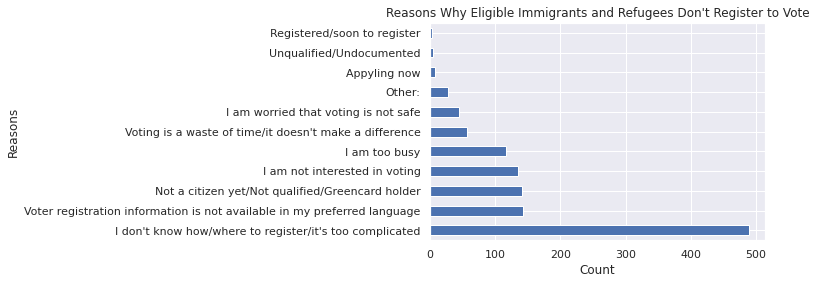

In [84]:
# Getting the counts for each reason why eligible immigrants don't register to vote
eligible_nonregistered_count = df['Q13'].value_counts()['I am eligible to register but have not registered yet']
eligible_nonregistered_df = df[df.Q14 != ' ']
eligible_nonregistered_df = eligible_nonregistered_df[eligible_nonregistered_df.Q14 != 'None/No Answer/Not applicable']
reasons = pd.DataFrame(eligible_nonregistered_df['Q14'].value_counts())
reasons.columns = ['Count']
dfi.export(reasons, 'reasons.png', table_conversion='matplotlib')
display(reasons)

# Plotting the counts for each reason
eligible_nonregistered_df['Q14'].value_counts().plot(kind='barh') 
plt.title("Reasons Why Eligible Immigrants and Refugees Don't Register to Vote")
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.savefig('eligible_nonregistered.png', bbox_inches='tight')


## 2. Do immigrants and refugees that are active in their civic engagement tend to have higher levels of education than those who are less active?

In [85]:
# Creating an "active" dataset and an "inactive" dataset
# Filtering out participants who weren't of voting age in 2012
age_filter_df = df[df['Q02'] < 1994]

active_mask1 = age_filter_df['Q12_01'] != ' '
active_mask2 = age_filter_df['Q18'] == 'Often'
active_mask3 = age_filter_df['Q18'] == 'Sometimes'
active_mask4 = age_filter_df['Q15'] == 'Yes'

active_df = age_filter_df[active_mask1 | active_mask2 | active_mask3 | active_mask4]

inactive_mask1 = age_filter_df['Q12_01'] == ' '
inactive_mask2 = age_filter_df['Q18'] != 'Often'
inactive_mask3 = age_filter_df['Q18'] != 'Sometimes'
inactive_mask4 = age_filter_df['Q15'] != 'Yes'

inactive_df = age_filter_df[inactive_mask1 & inactive_mask2 & inactive_mask3 & inactive_mask4]

# Functions for chi squared tests and tables
def get_contingency_table(active_dict, inactive_dict, keys):
    """
    Takes two dictionaries and a list of keys as parameters and returns
    a contingency table in the form of a DataFrame.
    """
    contingency_dict = {}
    for key in keys:
        for (item1, item2) in zip(active_dict, inactive_dict):
            contingency_dict[key] = [active_dict[key], inactive_dict[key]]
    contingency_table = pd.DataFrame(data=contingency_dict,
                                     index=['Active', 'Inactive'])
    return contingency_table


def get_percent_table(active_dict, inactive_dict, keys, active_df,
                      inactive_df):
    """
    Takes two dictionaries, a list of keys, and two dataframes as parameters
    and returns a DataFrame with the percentages for each column for each
    respective group (Active and Inactive).
    """
    percent_dict = {}
    active_count = len(active_df)
    inactive_count = len(inactive_df)
    for key in keys:
        for (item1, item2) in zip(active_dict, inactive_dict):
            percent_dict[key] = [(active_dict[key] / active_count),
                                     (inactive_dict[key] / inactive_count)]
    percent_table = pd.DataFrame(data=percent_dict,
                                 index=['Active', 'Inactive'])
    return percent_table


def chi2_test(contingency_table):
    """
    Takes a contingency table in the form of a DataFrame as a parameter
    and conducts a Chi-squared test with an alpha value of 0.05. Prints the
    statement 'Dependent (reject H0)' if the difference is calculated to be
    statistically significant or 'Independent (H0 holds true)' if otherwise.
    """
    active_data = list(contingency_table.loc['Active'])
    inactive_data = list(contingency_table.loc['Inactive'])
    data = [active_data, inactive_data]
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

# Table and chi-squared test for education level
ed_active_df = active_df[active_df['Q20'] != ' ']
ed_inactive_df = inactive_df[inactive_df['Q20'] != 'NA/Refused']
ed_inactive_df = ed_inactive_df[ed_inactive_df['Q20'] != ' ']
ed_active_dict = dict(ed_active_df['Q20'].value_counts())
ed_inactive_dict = dict(ed_inactive_df['Q20'].value_counts())
education_keys = ['Graduate or professional degree', 'College degree',
                  'Some college', 'High school graduate or GED',
                  'Some high school', 'Eighth grade or below', 'None']

ed_contingency_table = get_contingency_table(ed_active_dict, ed_inactive_dict,
                                             education_keys)
ed_percent_table = get_percent_table(ed_active_dict, ed_inactive_dict,
                                     education_keys, ed_active_df,
                                     ed_inactive_df)
dfi.export(ed_percent_table, 'education_table.png',
           table_conversion='matplotlib')
display(ed_percent_table)
chi2_test(ed_contingency_table)


,Graduate or professional degree,College degree,Some college,High school graduate or GED,Some high school,Eighth grade or below,None
Active,0.152928,0.235087,0.161063,0.197397,0.099783,0.084870,0.068872
Inactive,0.093629,0.177606,0.141892,0.245174,0.129344,0.108108,0.104247


p value is 1.1399982614406537e-12
Dependent (reject H0)


## 3. Do immigrants and refugees that are active in their civic engagement tend to have a greater proficiency in English than those who are less active?

In [86]:
english_active_df = active_df[active_df['Q06'] != ' ']
english_inactive_df = inactive_df[inactive_df['Q06'] != ' ']
english_active_dict = dict(english_active_df['Q06'].value_counts())
english_inactive_dict = dict(english_inactive_df['Q06'].value_counts())
english_keys = ['Very well', 'Well', 'Not well', 'Not at all']

english_contingency_table = get_contingency_table(english_active_dict,
                                                  english_inactive_dict,
                                                  english_keys)
english_percent_table = get_percent_table(english_active_dict,
                                          english_inactive_dict, english_keys,
                                          english_active_df,
                                          english_inactive_df)
dfi.export(english_percent_table, 'english_table.png',
           table_conversion='matplotlib')
display(english_percent_table)
chi2_test(english_contingency_table)


,Very well,Well,Not well,Not at all
Active,0.399567,0.308338,0.243368,0.048728
Inactive,0.158922,0.263941,0.462825,0.114312


p value is 4.1396012791306464e-73
Dependent (reject H0)


## 4. How does gender distribution differ between immigrants and refugees that are active in their civic engagement compared to those that are less active?

In [88]:
active_male = active_df['Q23'] == 'Male'
active_female = active_df['Q23'] == 'Female'
gender_active_df = active_df[active_male | active_female]
inactive_male = inactive_df['Q23'] == 'Male'
inactive_female = inactive_df['Q23'] == 'Female'
gender_inactive_df = inactive_df[inactive_male | inactive_female]
gender_active_dict = dict(gender_active_df['Q23'].value_counts())
gender_inactive_dict = dict(gender_inactive_df['Q23'].value_counts())
gender_keys = ['Female', 'Male']

gender_contingency_table = get_contingency_table(gender_active_dict,
                                                 gender_inactive_dict,
                                                 gender_keys)
gender_percent_table = get_percent_table(gender_active_dict,
                                         gender_inactive_dict, gender_keys,
                                         gender_active_df, gender_inactive_df)
dfi.export(gender_percent_table, 'gender_table.png',
           table_conversion='matplotlib')
display(gender_percent_table)
chi2_test(gender_contingency_table)


,Female,Male
Active,0.500861,0.499139
Inactive,0.591051,0.408949


p value is 8.735003134556704e-07
Dependent (reject H0)


## 5. Do immigrants and refugees that are active in their civic engagement tend to have higher incomes than those who are less active?

In [89]:
income_active_df = active_df[active_df['Q24'] != ' ']
income_active_df = income_active_df[income_active_df['Q24'] != "I don't know"]
income_active_df = income_active_df[income_active_df['Q24'] != 'NA/Refused']
income_inactive_df = inactive_df[inactive_df['Q24'] != ' ']
income_inactive_df = income_inactive_df[income_inactive_df['Q24'] != "I don't know"]
income_inactive_df = income_inactive_df[income_inactive_df['Q24'] != 'NA/Refused']
income_active_dict = dict(income_active_df['Q24'].value_counts())
income_inactive_dict = dict(income_inactive_df['Q24'].value_counts())
income_keys = ['More than $150,000', '$100,000 to $150,000',
               '$65,000 to $99,999', '$40,891 to $64,999',
               '$24,301 to $40,890', '$11,881 to $24,300',
               '$11,880 or less']

income_contingency_table = get_contingency_table(income_active_dict,
                                                 income_inactive_dict,
                                                 income_keys)
income_percent_table = get_percent_table(income_active_dict,
                                         income_inactive_dict, income_keys,
                                         income_active_df, income_inactive_df)
dfi.export(income_percent_table, 'income_table.png',
           table_conversion='matplotlib')
display(income_percent_table)
chi2_test(income_contingency_table)

,"More than $150,000","$100,000 to $150,000","$65,000 to $99,999","$40,891 to $64,999","$24,301 to $40,890","$11,881 to $24,300","$11,880 or less"
Active,0.061562,0.075976,0.113814,0.199099,0.28018,0.157057,0.112312
Inactive,0.033291,0.043534,0.058899,0.087068,0.25096,0.266325,0.259923


p value is 1.2605913192032034e-45
Dependent (reject H0)


## 6. Do immigrants and refugees that are active in their civic engagement tend to be younger than those who are less active?

In [90]:
summary, results = rp.ttest(group1= active_df['Q02'], group1_name='Active',
                            group2= inactive_df['Q02'],
                            group2_name= 'Inactive')
dfi.export(summary, 'summary_table.png', table_conversion='matplotlib')
display(summary)
display(results)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Active,3769.0,1970.564871,14.874050,0.242279,1970.089860,1971.039882
1,Inactive,1092.0,1970.653846,16.131482,0.488161,1969.696006,1971.611686
2,combined,4861.0,1970.584859,15.163948,0.217495,1970.158470,1971.011248


,Independent t-test,results
0,Difference (Active - Inactive) =,-0.0890
1,Degrees of freedom =,4859.0000
2,t =,-0.1707
3,Two side test p value =,0.8645
4,Difference < 0 p value =,0.4322
5,Difference > 0 p value =,0.5678
6,Cohen's d =,-0.0059
7,Hedge's g =,-0.0059
8,Glass's delta =,-0.0060
9,Pearson's r =,0.0024


## 7. What are the most important issues facing immigrant communities as reported by the participants?

,Count
Affordable housing/Low income housing,595
Jobs/Job search/More jobs available,478
Education/General educational resources,347
Difficulty in legal residence/Greencard issue/Obtaining citizenship/Immigration,276
Language help/Language specific education,234
Discrimination/Social justice/Equality,216
Other,202
Help the youth/youth services,200
Don’t know,189
Improve safety/Reduce crime,177


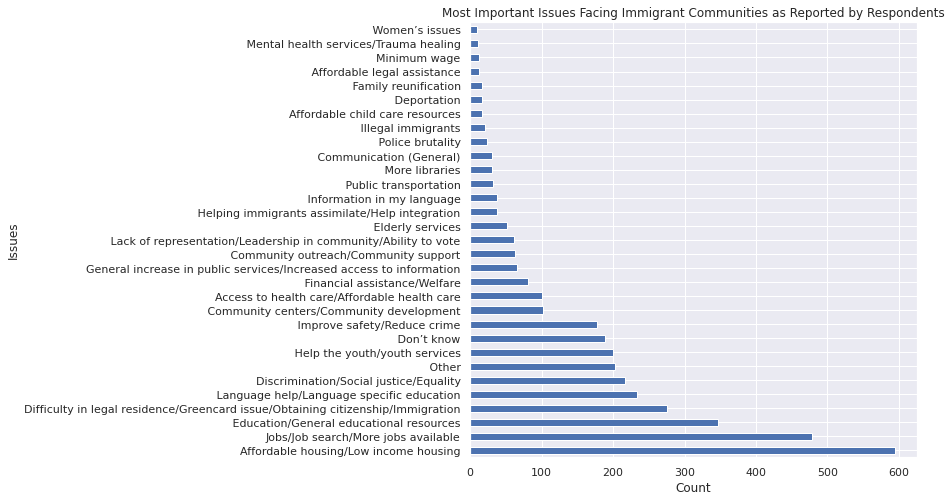

In [91]:
issues_df = df[df['Q07_CODE1'] != ' ']
issues = pd.DataFrame(issues_df['Q07_CODE1'].value_counts())
issues.columns = ['Count']
dfi.export(issues, 'issues_table.png', table_conversion='matplotlib')
display(issues)

issues_df['Q07_CODE1'].value_counts().plot(kind='barh', figsize=(8, 8))
plt.title('Most Important Issues Facing Immigrant Communities as Reported by Respondents')
plt.xlabel('Count')
plt.ylabel('Issues')
plt.savefig('immigrant_issues.png', bbox_inches='tight')


## What are the primary sources for information pertaining to elections, issues and candidates used by immigrants and refugees?

,Count
Internet,2889
Television in English,731
Ethnic Television,726
Friends and family,237
My community organization(s)/service provider(s),165
My place of worship,65
Ethnic newspapers,59
Newspapers in English,49
Library,35
Ethinic radio,30


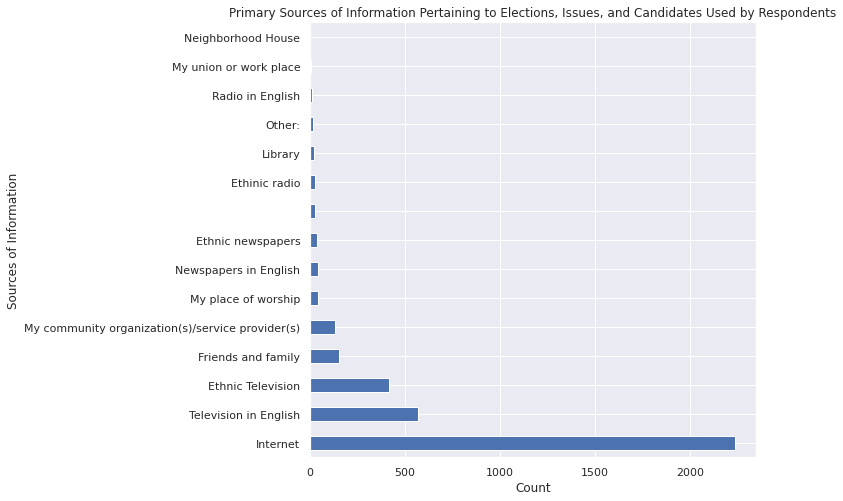

In [92]:
info_source_df = df[df['Q10_01'] != ' ']
info_sources = pd.DataFrame(info_source_df['Q10_01'].value_counts())
info_sources.columns = ['Count']
dfi.export(info_sources, 'info_sources_table.png',
           table_conversion='matplotlib')
display(info_sources)

issues_df['Q10_01'].value_counts().plot(kind='barh', figsize=(8, 8))
plt.title('Primary Sources of Information Pertaining to Elections, Issues, and Candidates Used by Respondents')
plt.xlabel('Count')
plt.ylabel('Sources of Information')
plt.savefig('source_of_info.png', bbox_inches='tight')
